## Data Science & Business Analytics

# Author : Shruti Jagtap

### Task 1: Prediction using supervised ML 

### predict the percentage of marks that a student based upon the number of hours they studied

#### Let's Start by importing all the labraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

### Read Data From Link Using Pandas

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


#### Let's plot this data distribution using matplotlib 

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


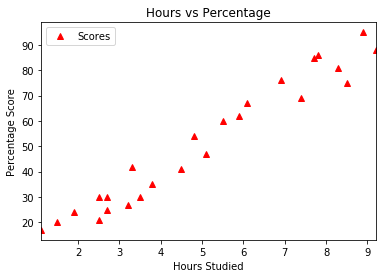

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='^', color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

#### now let's import all libraries we will need for preparing the data and traning the model

In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

In [7]:
# Let's split the data into attributes and labels

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#### Now split this data into training and test sets. We'll do this by using Scikit-Learn's

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### traning using linear regression 

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
predicted_y = regressor.predict(X_test)
print("predicted y records")
print(predicted_y)

predicted y records
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [10]:
# Testing data - In Hours
print(X_test)

# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


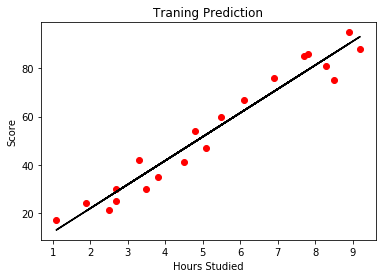

In [11]:

# Plotting for the Train data

plt.scatter(X_train, y_train, color ='red')
plt.plot(X_train,regressor.predict(X_train), color ='black');
plt.title('Traning Prediction')  
plt.xlabel('Hours Studied')  
plt.ylabel( 'Score')  
plt.show()

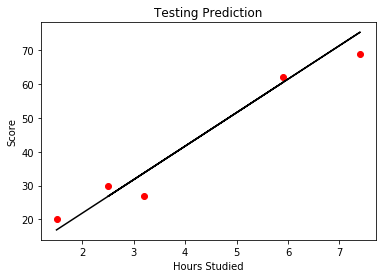

In [12]:
#Test data
# Plotting the regression line

line = regressor.coef_*X + regressor.intercept_
plt.scatter(X_test, y_test, color ='red')
plt.plot(X_test,regressor.predict(X_test), color ='black');
plt.title('Testing Prediction')  
plt.xlabel('Hours Studied')  
plt.ylabel( 'Score')  
plt.show()

### mean absolute error for this model

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_absolute_error(y_test, y_pred)) )

Mean Absolute Error: 4.183859899002975
Root Mean Squared Error :  2.0454485813637495


### let's compare Actual and our predicted values

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [16]:
print(regressor.coef_,'+', regressor.intercept_)

[9.91065648] + 2.018160041434683
